# Fishery Data Exploration
The purpose of this competition on [Kaggle](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring) is to develop a model that classifies species of fish within a collection of images.  This notebook exhibits a brief exploration of the dataset and preprocesses the data for model development later.  Images are stored in the working directory folder 'data', sub-divided by train and test set.  The training set are also sub-divided by species, while the test_stg1 set are mixed and not separated by species folders.

#### Dependencies

In [1]:
import numpy as np
from scipy import ndimage, misc
import os
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import cPickle as pickle



## Questions
### Are the images of similar aspect and pixel sizes?

In [2]:
print(os.listdir('data'))
print(os.listdir('data/train'))
print(os.listdir('data/train/ALB')[0:10])

['.DS_Store', 'test_stg1', 'test_stg1.zip', 'train', 'train.zip']
['.DS_Store', 'ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
['img_00003.jpg', 'img_00010.jpg', 'img_00012.jpg', 'img_00015.jpg', 'img_00019.jpg', 'img_00020.jpg', 'img_00029.jpg', 'img_00032.jpg', 'img_00037.jpg', 'img_00038.jpg']


In [3]:
for fish in os.listdir('data/train')[1:] :
    for image in os.listdir('data/train/'+fish)[0:3] :
        arr = ndimage.imread('data/train/'+fish+'/'+image, flatten = False)
        print("Shape: {}      Aspect Ratio: {:.2f}".format(arr.shape, arr.shape[1]/arr.shape[0]))

Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (974, 1280, 3)      Aspect Ratio: 1.31
Shape: (854, 1518, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (750, 1280, 3)      Aspect Ratio: 1.71
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (750, 1280, 3)      Aspect Ratio: 1.71
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (974, 1280, 3)      Aspect 

**Answer:** Images appear to be of different pixel sizes and aspect ratios, and are RGB format.  

### How many of each fish species are present in the training set?

In [4]:
count = 0
for fish in os.listdir('/'.join(['data','train'])) :
    try : 
        print("{} contains {} images".format(fish, len(os.listdir('/'.join(['data','train',fish])))))
        count += len(os.listdir('/'.join(['data','train',fish])))
    #print(fish)
    except :
        pass
print("\nTOTAL TRAINING IMAGES: {}".format(count))                      

ALB contains 1719 images
BET contains 200 images
DOL contains 117 images
LAG contains 67 images
NoF contains 465 images
OTHER contains 299 images
SHARK contains 176 images
YFT contains 734 images

TOTAL TRAINING IMAGES: 3777


**Answer:** The counts of each fish are not equal in the training set.  Special precautions will be taken to avoid problems associated with unbalanced data sets.  3777 is not a vast amount for neural network training.  One potential strategy is to duplicate images with distortion in order to balance the dataset and provide extra training examples.  

**NOTE:** A fn has been written to generate a list of filenames for a data input pipeline.  This, and other helper functions will be deposited into a script named 'fish_data.py'. 

### What is the average pixel value in each channel for the full training dataset?

In [5]:
import fish_data as fd
help(fd.generate_filenames_list)

Help on function generate_filenames_list in module fish_data:

generate_filenames_list(subdirectory='data/train/', subfolders=True)
    Iterates through the default 'data/train' folders of the working directory to
    generate a list of filenames



In [22]:
filenames = fd.generate_filenames_list(subdirectory= 'data/train/', subfolders = True)
print(filenames[0:2])
test_filenames = fd.generate_filenames_list(subdirectory = 'data/test_stg1/', subfolders = False)
print(test_filenames[0:2])

['data/train/ALB/img_00003.jpg', 'data/train/ALB/img_00010.jpg']
['data/test_stg1/img_00005.jpg', 'data/test_stg1/img_00007.jpg']


In [7]:
mean_red, mean_green, mean_blue = [], [], []

for im in filenames :
    img = ndimage.imread(im)
    mean_red.append(np.mean(img[:,:,0]))
    mean_green.append(np.mean(img[:,:,1]))
    mean_blue.append(np.mean(img[:,:,2]))

In [8]:
R_offset = np.mean(mean_red)
G_offset = np.mean(mean_green)
B_offset = np.mean(mean_blue)

print("Average pixel values\n     red: {}\n     green: {}\n     blue: {}".format(R_offset, G_offset, B_offset))

Average pixel values
     red: 96.48265253757386
     green: 107.20367931267522
     blue: 99.97448662926035


#### Store the dimensions for each image

In [23]:
dimension_dict = {}
for f in filenames :
    shape_tup = ndimage.imread(f).shape
    dimension_dict.update( {f : shape_tup})
for fi in test_filenames :
    shape_tup = ndimage.imread(fi).shape
    dimension_dict.update( {fi : shape_tup})
    

In [24]:
print(dimension_dict.get(filenames[10]))
print(dimension_dict.get(test_filenames[10]))

(750, 1280, 3)
(720, 1280, 3)


In [25]:
import json

with open('dimensions_dict.json', 'w') as f:
    json.dump(dimension_dict, f)

## Image Inspection and crop strategy

In [14]:
help(fd.show_panel)

Help on function show_panel in module fish_data:

show_panel(image)
    Convenience function for showing an inline montage of the colour and merged channels



In [15]:
def show_panel(image) :
    """Convenience function for showing an inline montage of the colour and merged channels"""
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.imshow(image[:,:,0], cmap = 'Reds')
    plt.subplot(2,2,2)
    plt.imshow(image[:,:,1], cmap = 'Greens')
    plt.subplot(2,2,3)
    plt.imshow(image[:,:,2], cmap = 'Blues')
    plt.subplot(2,2,4)
    plt.imshow(image)
    plt.show()


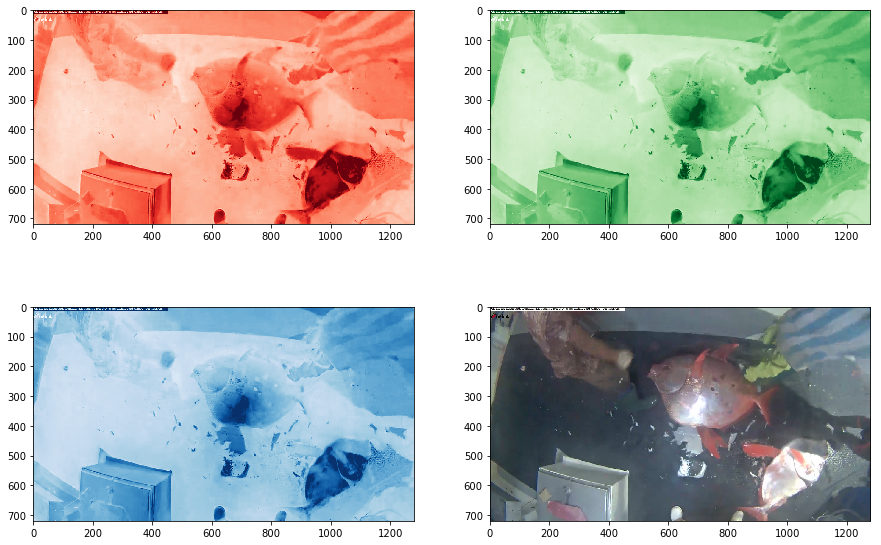

In [16]:
test_img = ndimage.imread('data/train/LAG/'+os.listdir('data/train/LAG')[0])
show_panel(test_img)

#### Image resize

The smallest dimension should be to 256. 

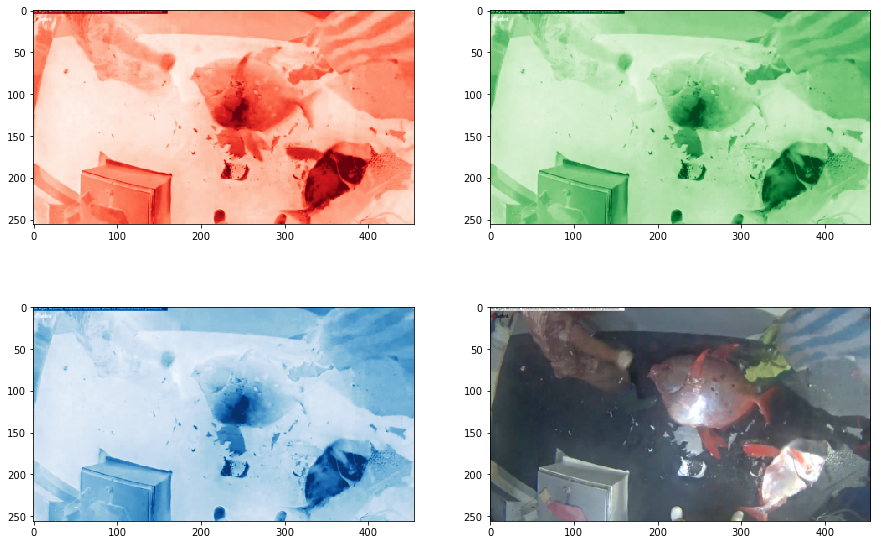

In [17]:
y, x, _ = test_img.shape
mod_test_img = misc.imresize(test_img, size = (256,np.int(256*(x/y))))
show_panel(mod_test_img)

#### Image resize and crop

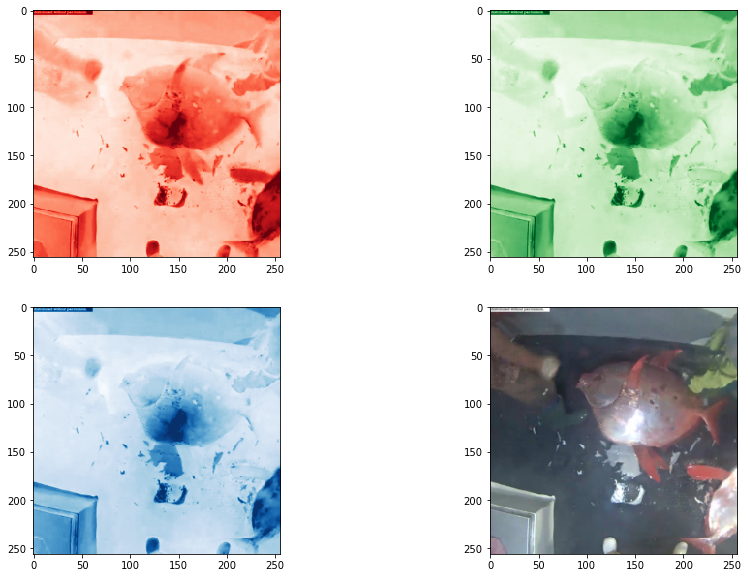

In [18]:
y, x, _ = test_img.shape
xp = np.int(256*(x/y))
mod_test_img = misc.imresize(test_img, size = (256,xp))
x_offset = (xp - 256) // 2

mod_mod_test_img = mod_test_img[:, x_offset:(x_offset+256), :]
show_panel(mod_mod_test_img)



In [19]:
def resize_crop(img, length) :
    y, x, _ = img.shape
    xp = np.int(length*(x/y))
    mod_test_img = misc.imresize(img, size = (length,xp))
    x_offset = (xp - length) // 2
    mod_test_img = mod_test_img[:, x_offset:(x_offset+length), :]
    return(mod_test_img)


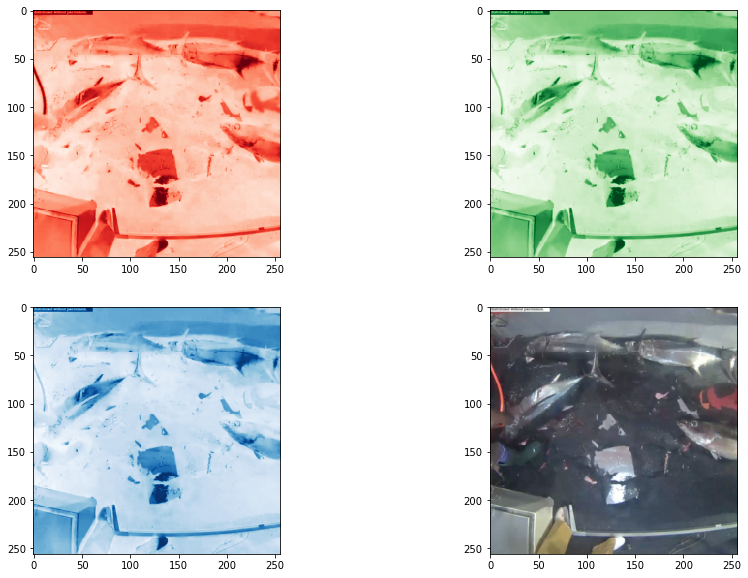

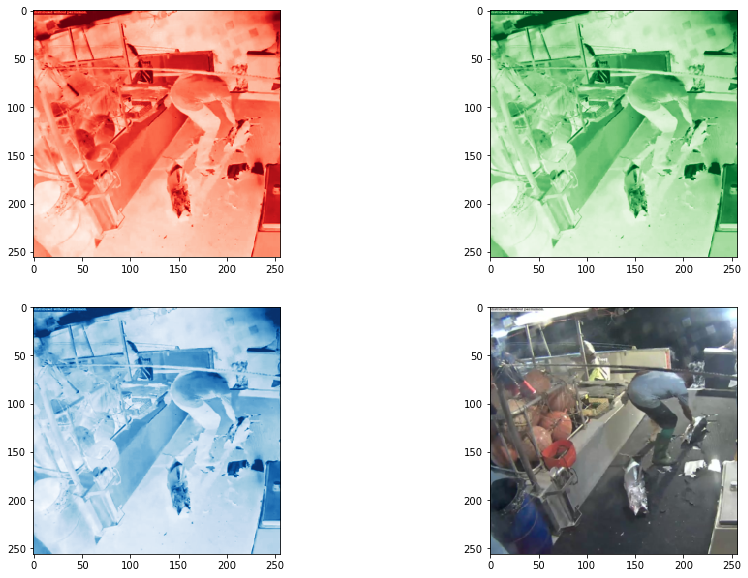

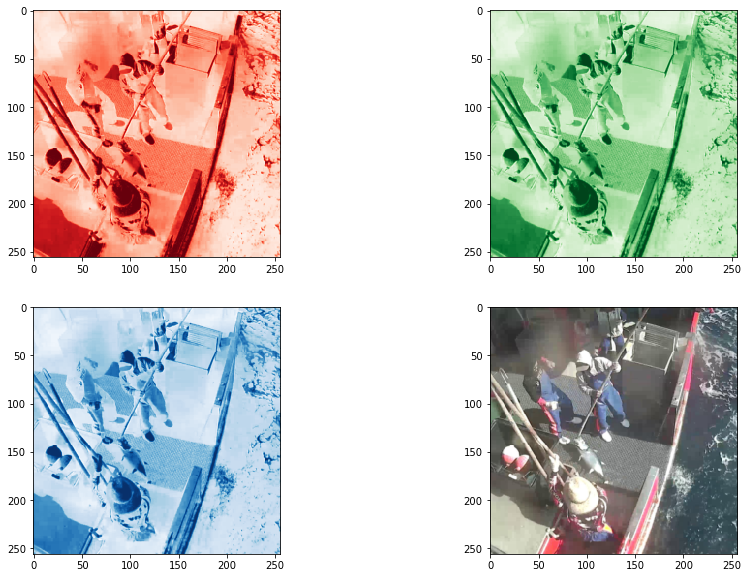

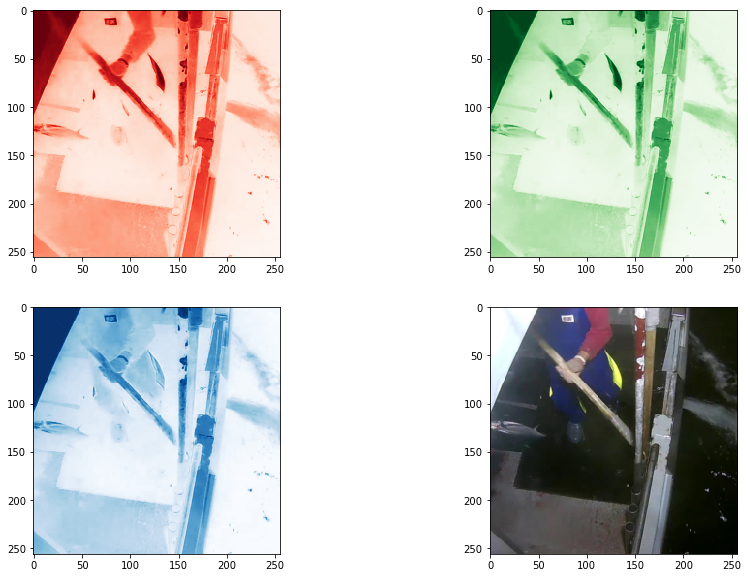

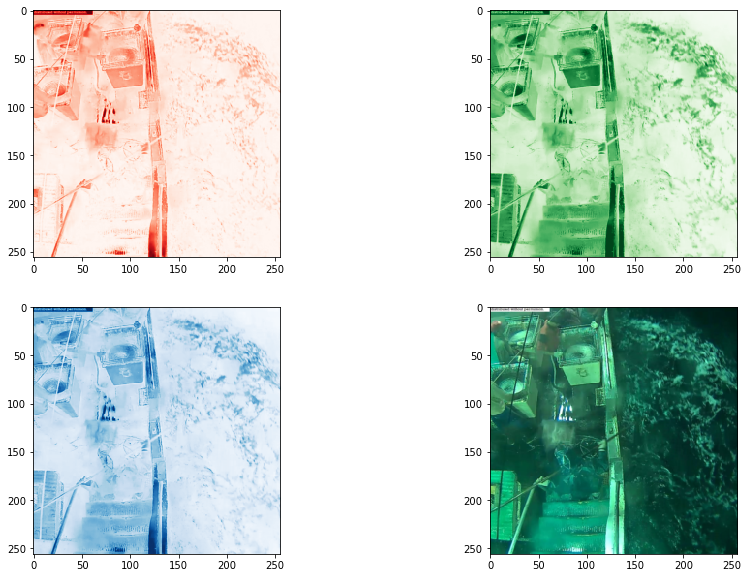

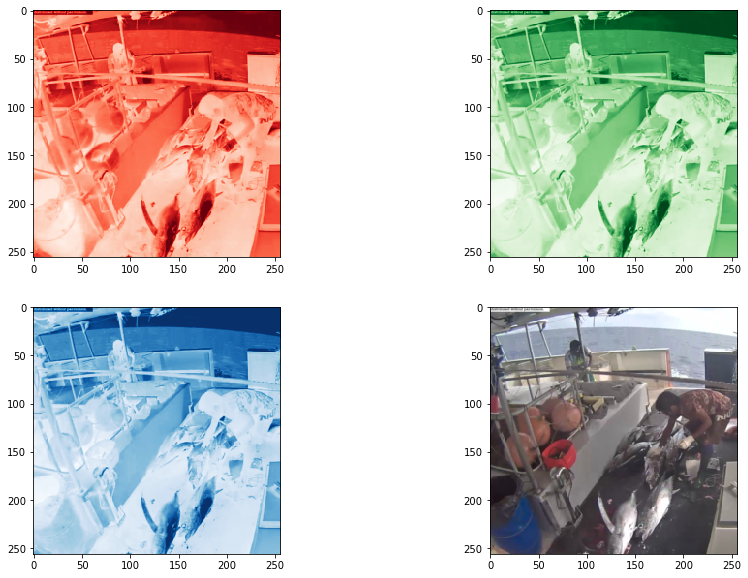

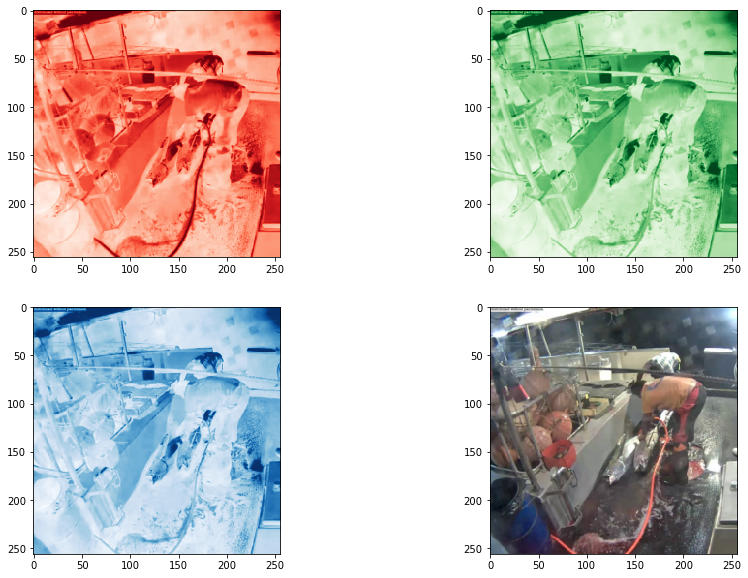

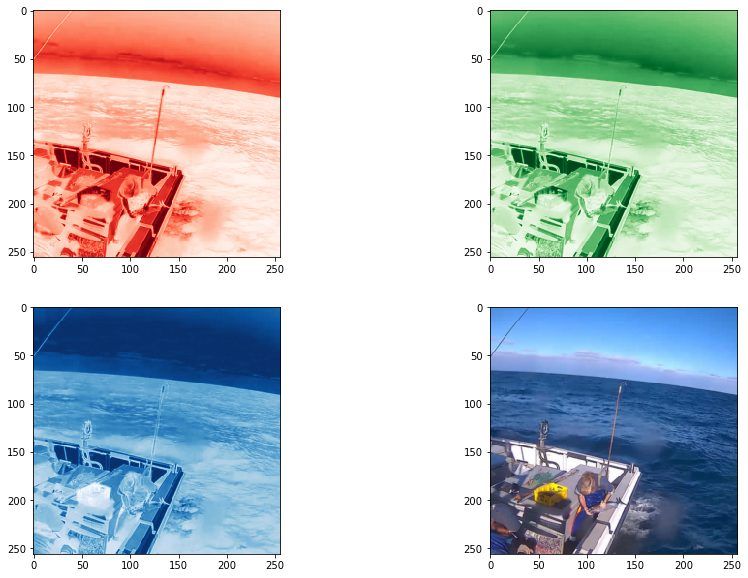

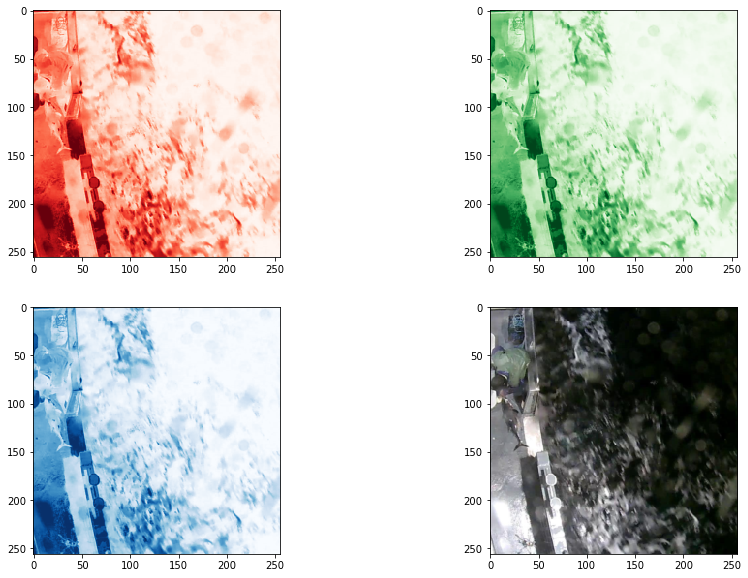

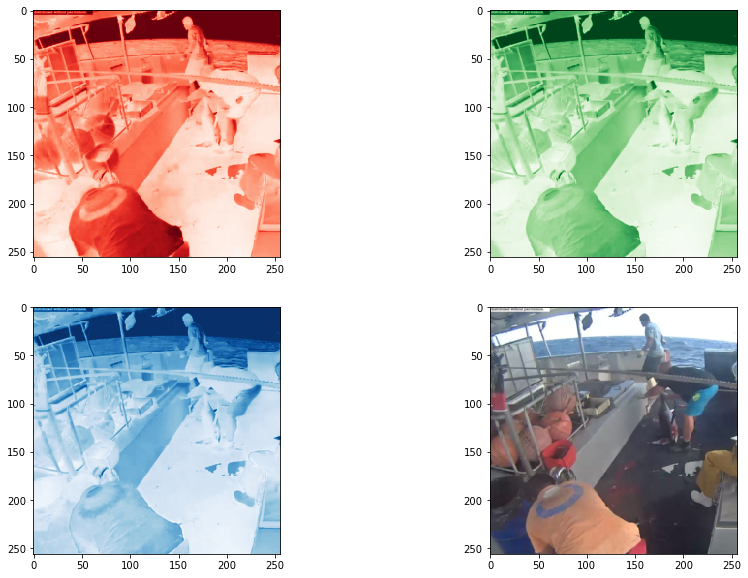

In [20]:
for i in range(10) :
    show_panel(resize_crop(ndimage.imread('data/train/ALB/'+os.listdir('data/train/ALB')[i]), 256))

## Data Preprocessing 

#### Input Strategy

Although 3777 images is not a large data set, the images are of a high resolution, making environment memory an issue.  Instead of loading and preprocessing the entire image set, images will be fed into the reader pipeline in batches, pre-processed in the first steps, and subsequently used for training or validation.  

The basic input strategy will be to load a large cohort of images into a queue, with their associated label, and then dequeue one image and label at time.  The image will be resized such that the smallest dimension is a standard value (256, as of right now), and the larger dimension maintains the aspect ratio.  Subsequently a central crop will produce an image that is 256 pixels in both dimensions.  Cursory analysis shows that the fish is evident in most, but not all, of the images processed in this fashion.  Finally, the mean pixel value for each channel will be subtracted for centering.  As of right now, I will not normalize to a standard deviation, however this strategy may change.  

#### Data Augmentation
This dataset is both small and unbalanced.  Repeated epoch training of the same images will usually lead to an overfit model that does not generalize well.  On the other hand, the unbalanced dataset can easily lead to the generation of a biased model that simply predicts the majority class.  To address these issues, the training image set will be augmented as follows.  

The first step is to duplicate the filenames in the training list such that each class is equally represented.  For some fish species, (e.g. 'ALB'), very few images will be duplicated.  For others, such as 'LAG', image filenames will be repeatedly duplicated.  As images from this balanced filename list are read into the model, they will be randomly mutated with horizontal and/or vertical reflection.  Finally, a random 224x224 crop will be made.  The resultant images from a single filename will be interdependent, but rarely identical.  It also appears that many image in the dataset are simply frames from a video over the course of a few seconds.  As such, this problem of interdependency is unavoidable in any case.  

I may experiment with color distortion as well, but this will be one of the final tuning steps.  

#### Validation and Testing

Images loaded for the purpose of validation or testing will be input as described above, except no reflection (or color distortion) will be made.  At first a single central crops will be made in order to gain a 224x224 image.  However later stages may utilize several random crops with logit averages made for the final prediction array.  